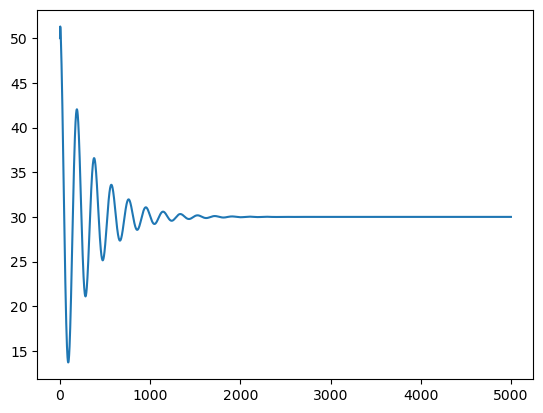

In [9]:
import control as ct
import matplotlib.pyplot as plt
import sys
from simple_pid import PID
import time

s = ct.tf('s')
t = time.time()

# In this script, the Load Frequency Control system of a single
# area is defined by its Transfer Function. The system converges

# Parameters
Kps, h, d = 1, 5, 0.015 
Kg, Tg = 1, 0.8
Kt, Tt = 1, 0.3
R = 0.05
#i = 10

# Feedback loop
droop = -R
Kp = 0.7
Ki = 0.8
Kd = 15

# Transfer function of Generator plant
generator = Kps / (2*h*s + d)
# Defining set point value for frequency
ref = 50

# Transfer functions of PID, Governor, Turbine and Load Change
#e = ref - i
pid = Kp*s + Ki/s + Kd*s
governor = Kg / (1 + Tg*s)
turbine = Kt / (1 + Tt*s)
delta_p = 1/s

# Open loop gain of PID, Governor and Turbine
ol = ct.series(pid,governor, turbine)

# Transfer function of the open loop nserting the step load change
ol1 = ol - delta_p

# Open loop transfer function combining the whole system
ol2 = ct.series(ol1,generator)

# Closed loop transfer function including the droop as constant feedback
cl_sys = ct.feedback(ol2,droop)

# Setting a reference value for the PID controller in the closed loop system
single_area = cl_sys + ref


response = ct.step_response(single_area, T = 5000)

#i = response.outputs

plt.plot(response.time, response.outputs)

plt.show()